# Case Description

### Task Description
Basketball tournaments are usually split in two parts. First, all teams play each other aiming to achieve the greatest number of wins possible. Then, at the end of the first part of the season, a pre determined number of teams which were able to win the most games are qualified to the playoff season, where they play series of knock-out matches for the trophy.

For the 10 years, data from players, teams, coaches, games and several other metrics were gathered and arranged on this dataset. The goal is to use this data to predict which teams will qualify for the playoffs in the next season.

### Data Description
The data about the players, teams and coaches consist of following relations:

- relation awards_players (96 objects) - each record describes awards and prizes received by players across 10 seasons,
- relation coaches (163 objects) - each record describes all coaches who've managed the teams during the time period,
- relation players (894 objects) - each record contains details of all players,
- relation players_teams (1877 objects) - each record describes the performance of each player for each team they played,
- relation series_post (71 objects) - each record describes the series' results,
- relation teams (143 objects) - each record describes the performance of the teams for each season,
- relation teams_post (81 objects) - each record describes the results of each team at the post-season.

# Data Cleaning

## Tables Analysis

We started with Exploratory Data Analysis. There are 7 different tables, with different sizes both in lines and columns.

In [1]:
from utils_cleaning import *


### Awards Players
The first table analysed was awards_players: each record describes awards and prizes received by players across 10 seasons.

In [2]:
#Read the dataset
awards_players_dataSet = pd.read_csv('../Other/basketballPlayoffs/awards_players.csv')

The first approach was to find if there were any missing, duplicate or redundant data:

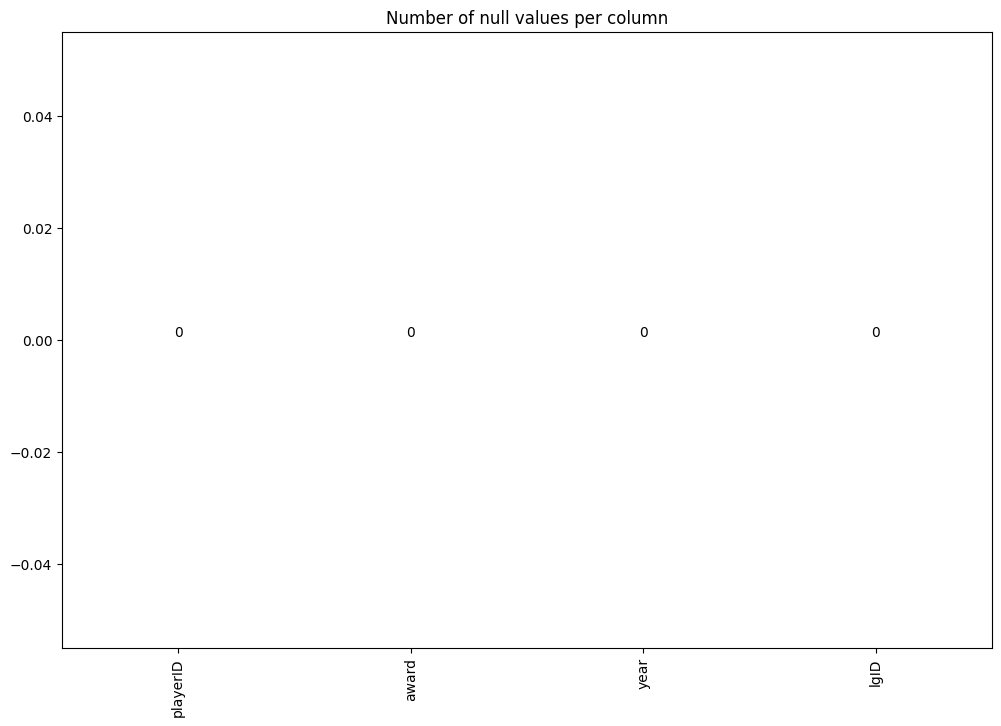

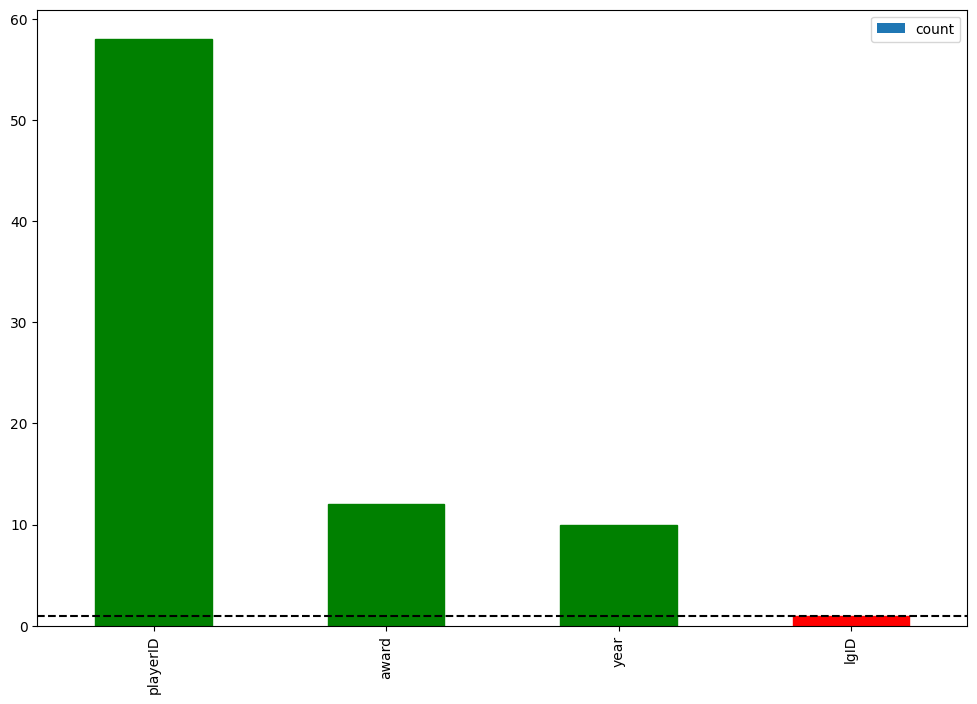

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [3]:
#check if there are null values in the dataset
nulls_values_by_column(awards_players_dataSet)

#check if there are unique values in the dataset
unique_values_by_column(awards_players_dataSet, 1)

#remove the column/s that have only one unique value
num_columns = len(awards_players_dataSet.columns)
awards_players_dataSet = filter_column_uniques(awards_players_dataSet, 1)
print(f"Removed {num_columns - len(awards_players_dataSet.columns)} columns that had only one unique value")

#remove duplicated rows (if present)
num_rows = awards_players_dataSet.shape[0]
awards_players_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - awards_players_dataSet.shape[0]} repeated rows")


We also saw that the same awards table contained both "Coach of the Year" and awards regarding only the players.
Because of this reason we decided to split the two types of award in two different dataset:

In [4]:
awards_players_dataSet = awards_players_dataSet[awards_players_dataSet.award != 'Kim Perrot Sportsmanship']
awards_players_dataSet = awards_players_dataSet[awards_players_dataSet.award != 'Kim Perrot Sportsmanship Award']

#We are splitting the awards of the players and the coaches
df_coaches = pd.DataFrame(awards_players_dataSet[awards_players_dataSet.award == 'Coach of the Year'])
df_coaches.rename(columns={'playerID': 'coachID'}, inplace=True)

df_players = pd.DataFrame(awards_players_dataSet[awards_players_dataSet.award != 'Coach of the Year'])

We saved the two different databases:

In [5]:
df_players.to_csv('../newData/awards_players_cleaned.csv', index=False)
df_coaches.to_csv('../newData/awards_coaches_cleaned.csv', index=False)

### Coaches
We after studied the coaches dataset: each record describes all coaches who've managed the teams during the time period.

In [6]:
coaches_dataSet = pd.read_csv('../Other/basketballPlayoffs/coaches.csv')

As before we treated the missing, duplicate or redundant data:

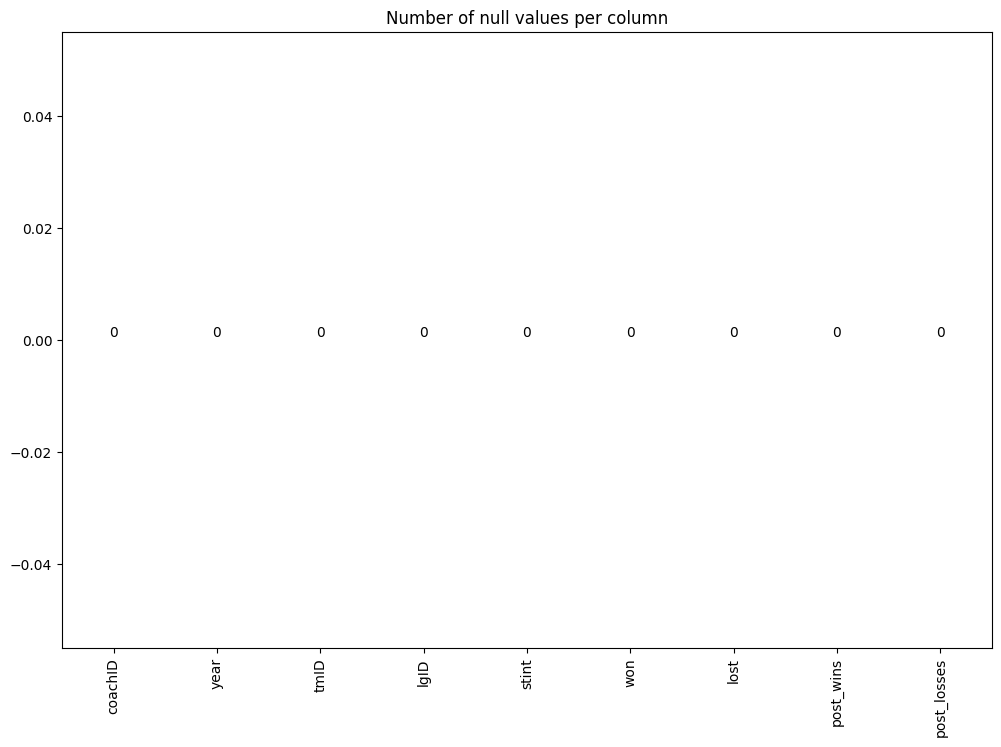

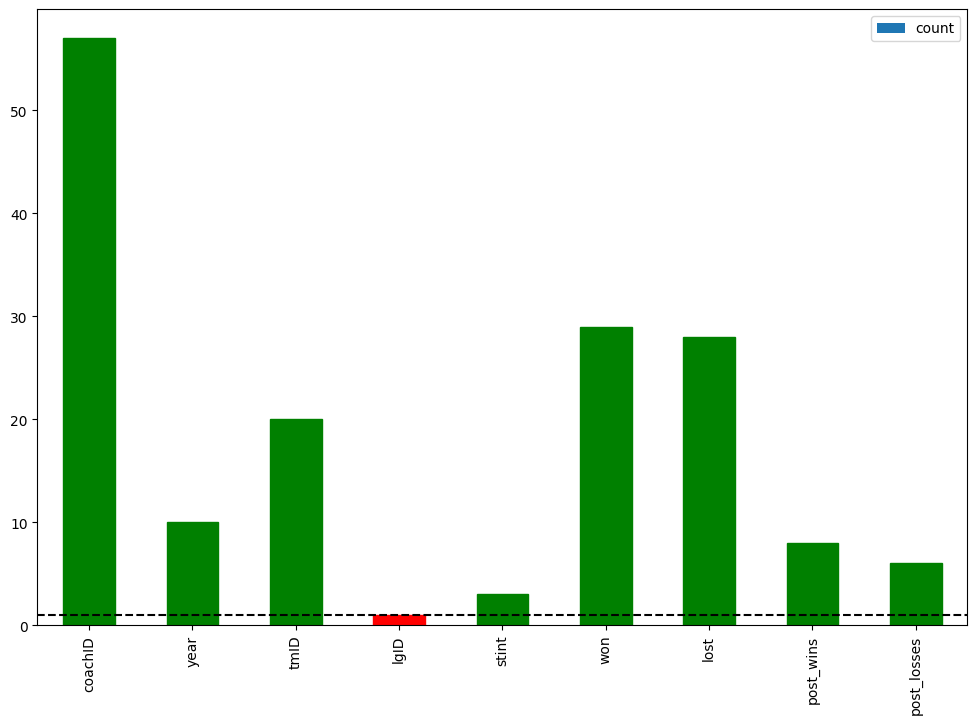

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [7]:
#check if there are null values in the dataset
nulls_values_by_column(coaches_dataSet)

#check if there are unique values in the dataset
unique_values_by_column(coaches_dataSet, 1)

#remove the column/s that have only one unique value
num_columns = len(coaches_dataSet.columns)
coaches_dataSet = filter_column_uniques(coaches_dataSet, 1)
print(f"Removed {num_columns - len(coaches_dataSet.columns)} columns that had only one unique value")

#remove duplicated rows (if present)
num_rows = coaches_dataSet.shape[0]
coaches_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - coaches_dataSet.shape[0]} repeated rows")


We proceeded to analyze whether were present any outliers and noise:

<Figure size 1500x1000 with 0 Axes>

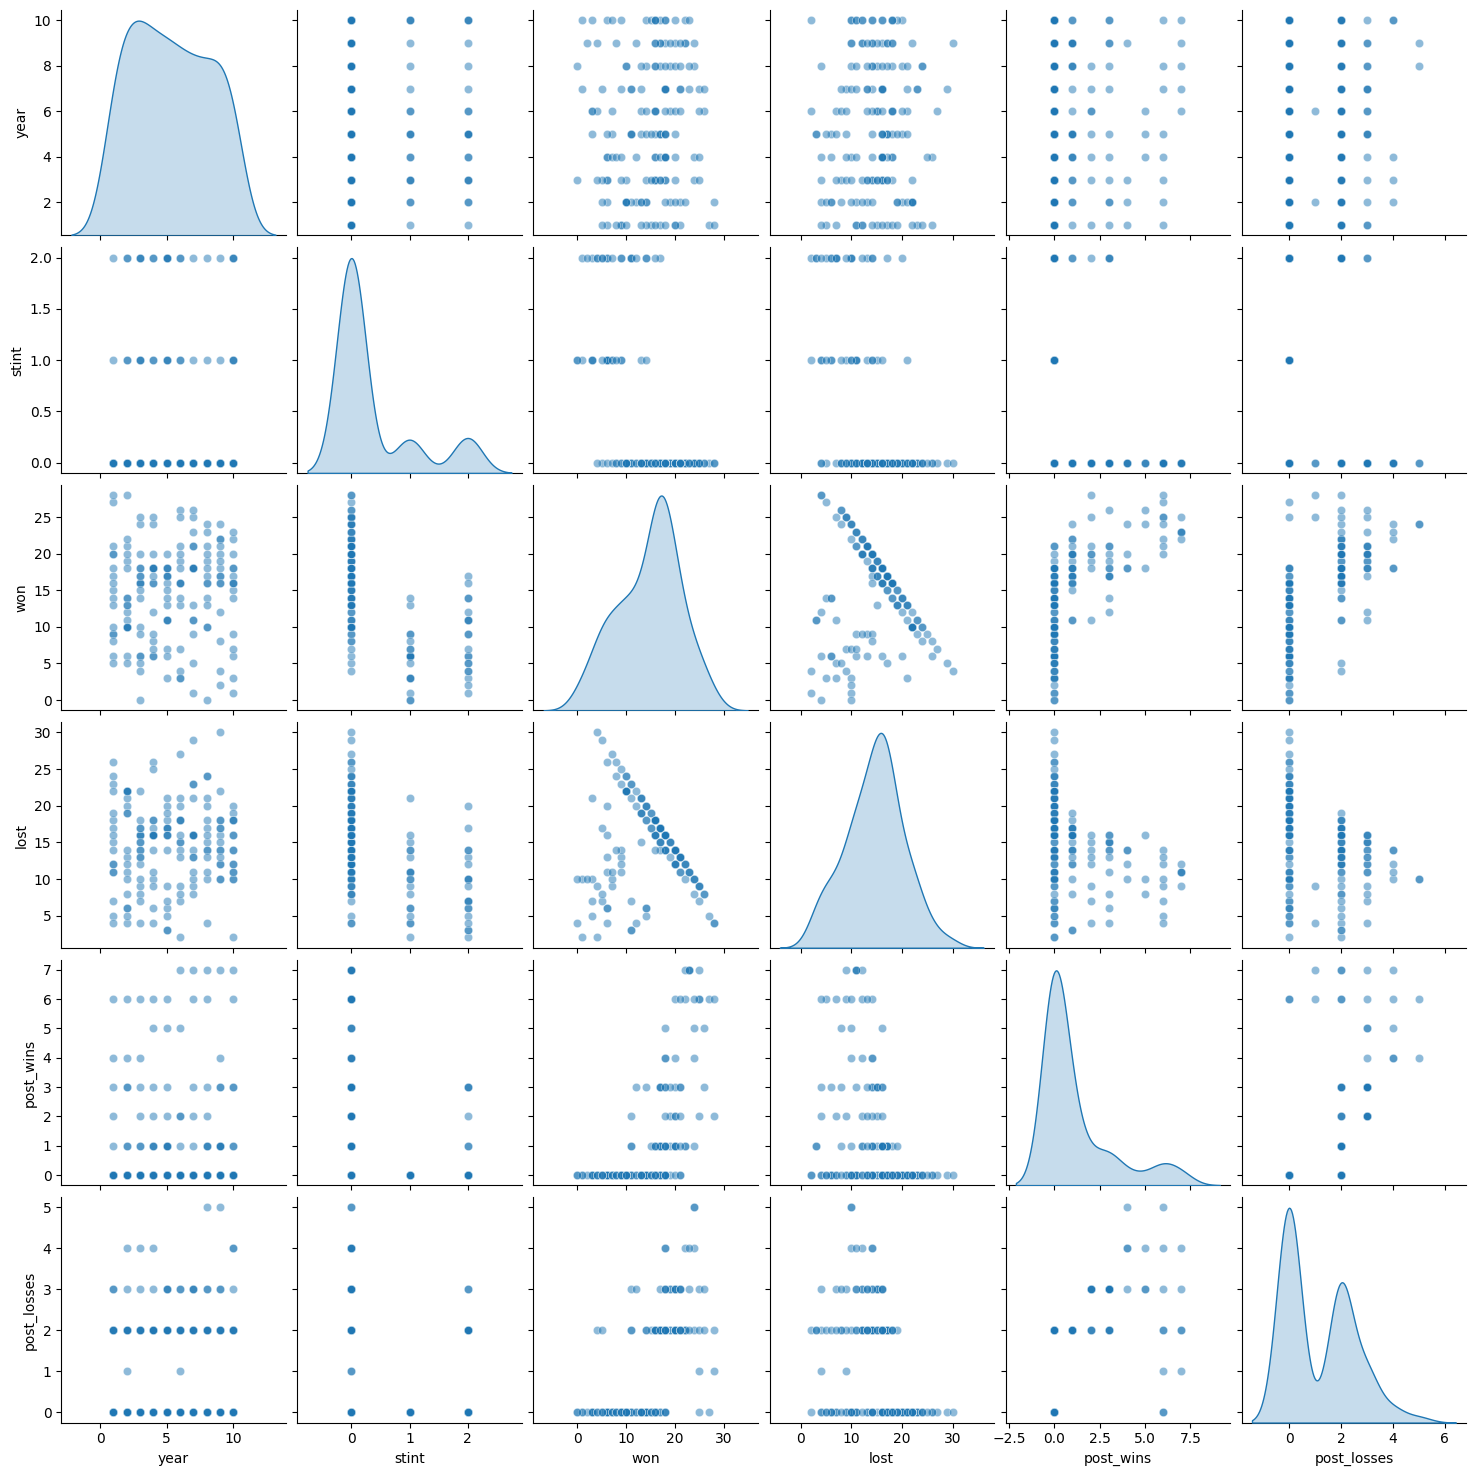

Founded 0 (0.0%) outliers
Removed 0 rows (0.0%)


In [8]:
# using the scatterplot to identify the presence of outliers
rows_to_drop = set()
init_num_rows_coaches = coaches_dataSet.shape[0]

scatter_plot(coaches_dataSet.drop(rows_to_drop))

print(f"Founded {len(rows_to_drop)} ({round(len(rows_to_drop) / coaches_dataSet.shape[0] * 100, 1)}%) outliers")
coaches_dataSet.drop(rows_to_drop, axis = 0, inplace=True)
print(f"Removed {init_num_rows_coaches - coaches_dataSet.shape[0]} rows ({round((init_num_rows_coaches - coaches_dataSet.shape[0]) / init_num_rows_coaches * 100, 1)}%)")

Saving the dataset

In [9]:
coaches_dataSet.to_csv('../newData/coaches_cleaned.csv', index=False)

### Players
Next dataset analysed: each record contains details of all players.

In [10]:
players_dataSet = pd.read_csv('../Other/basketballPlayoffs/players.csv')

Dealing with missing/duplicate/redundant data

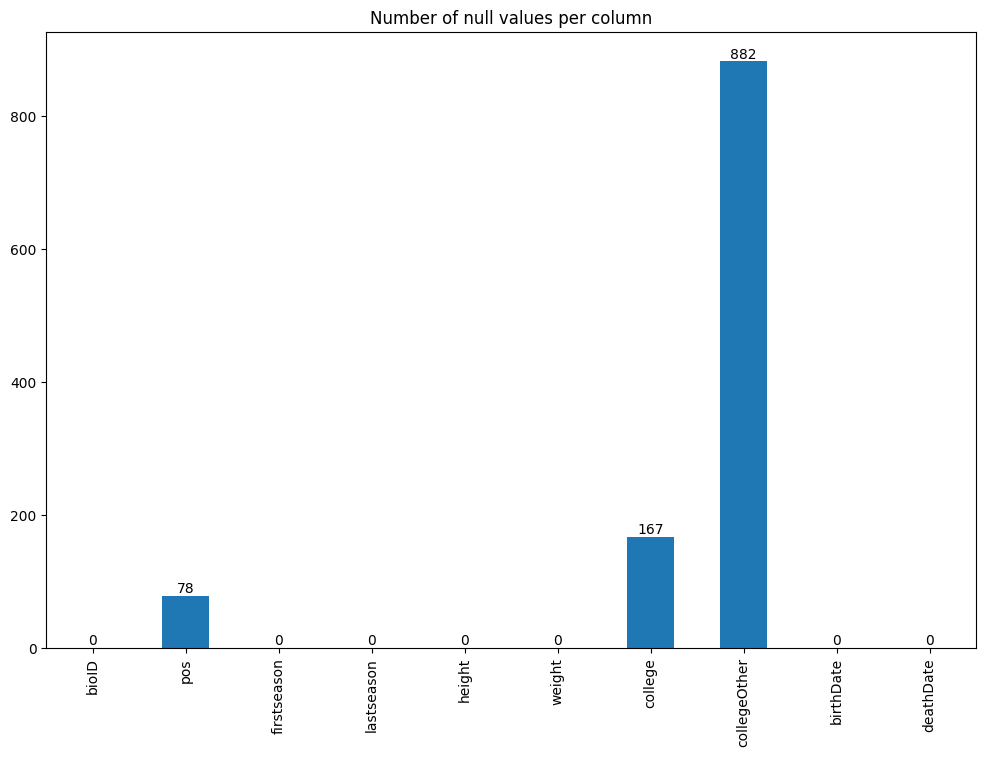

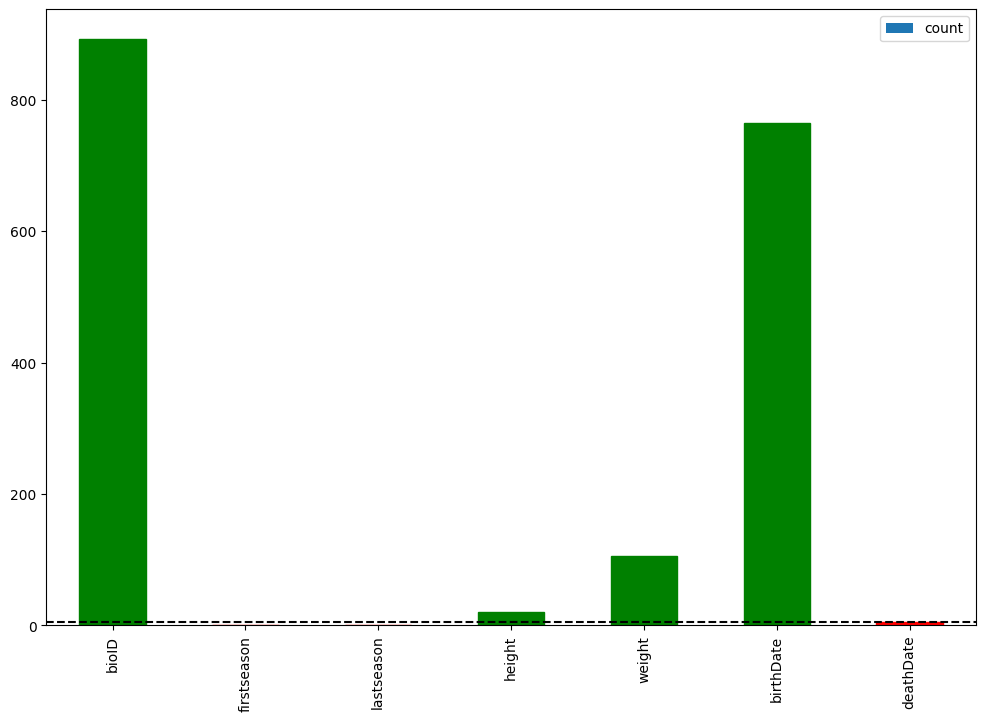

Removed 3 columns that had only five uniques values
Removed 0 repeated rows


In [11]:
nulls_values_by_column(players_dataSet)

players_dataSet.drop(columns=['collegeOther', 'pos', 'college'], inplace=True, axis=1)

unique_values_by_column(players_dataSet, 5)

num_columns = len(players_dataSet.columns)
players_dataSet = filter_column_uniques(players_dataSet, 5)
print(f"Removed {num_columns - len(players_dataSet.columns)} columns that had only five uniques values")

num_rows = players_dataSet.shape[0]
players_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - players_dataSet.shape[0]} repeated rows")

Analysis of the presence of outliers and noise

<Figure size 1500x1000 with 0 Axes>

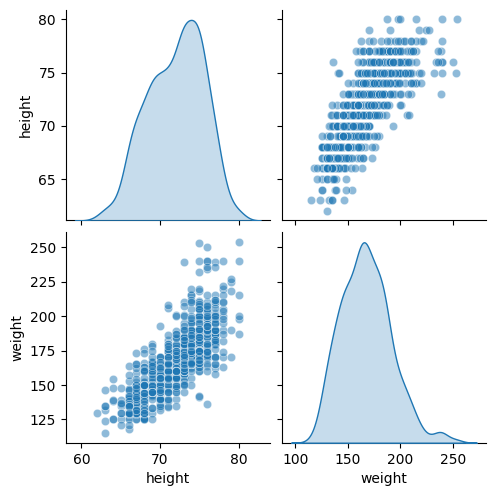

Founded 0 (0.0%) outliers
Removed 0 rows (0.0%)


Index(['bioID', 'height', 'weight', 'birthDate'], dtype='object')

In [12]:
#Remove the player still alive
players_dataSet = players_dataSet[players_dataSet.birthDate != '0000-00-00']

#Remove the player with wrong height
players_dataSet = players_dataSet[players_dataSet.height > 10]

#Remove the player that have a weight equal to zero
players_dataSet = players_dataSet[players_dataSet['weight'] != 0]

rows_to_drop = set()
init_num_rows_players = players_dataSet.shape[0]

scatter_plot(players_dataSet.drop(rows_to_drop, errors='ignore'))
print(f"Founded {len(rows_to_drop)} ({round(len(rows_to_drop) / players_dataSet.shape[0] * 100, 1)}%) outliers")
players_dataSet.drop(rows_to_drop, axis = 0, inplace=True, errors='ignore')
print(f"Removed {init_num_rows_players - players_dataSet.shape[0]} rows ({round((init_num_rows_players - players_dataSet.shape[0]) / init_num_rows_players * 100, 1)}%)")

players_dataSet.columns

Saving the dataset

In [13]:
players_dataSet.to_csv('../newData/players_cleaned.csv', index=False)

### Players Teams
Next dataset: each record describes the performance of each player for each team they played.

In [14]:
players_teams_dataSet = pd.read_csv('../Other/basketballPlayoffs/players_teams.csv')

As previously dealing with missing/duplicate/redundant data

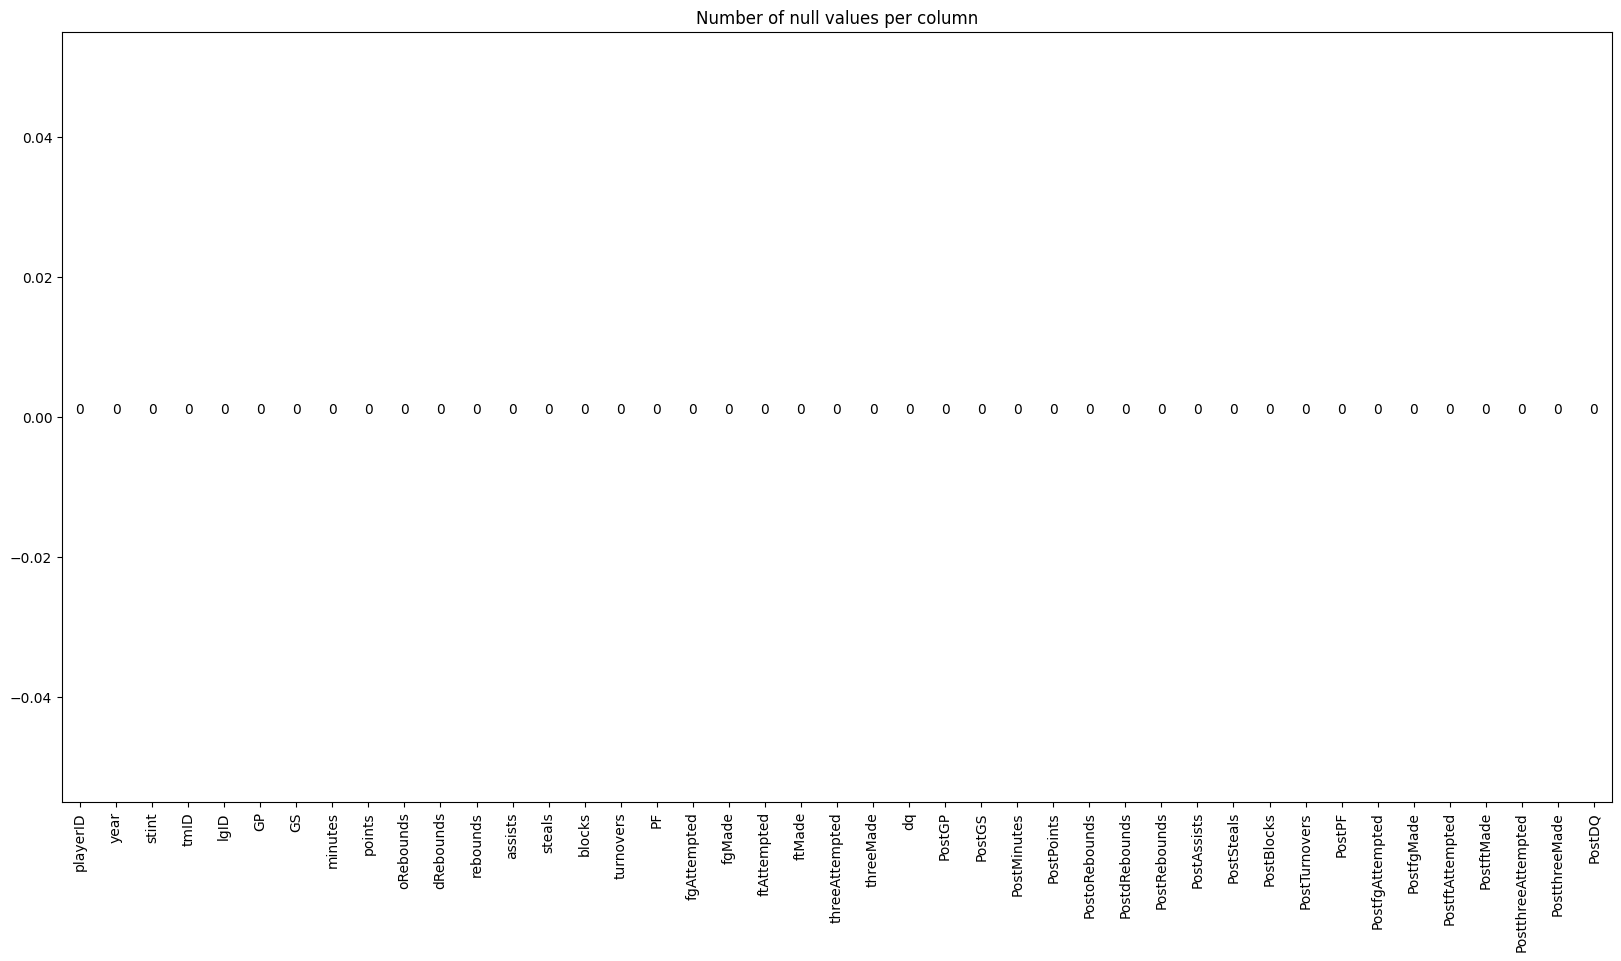

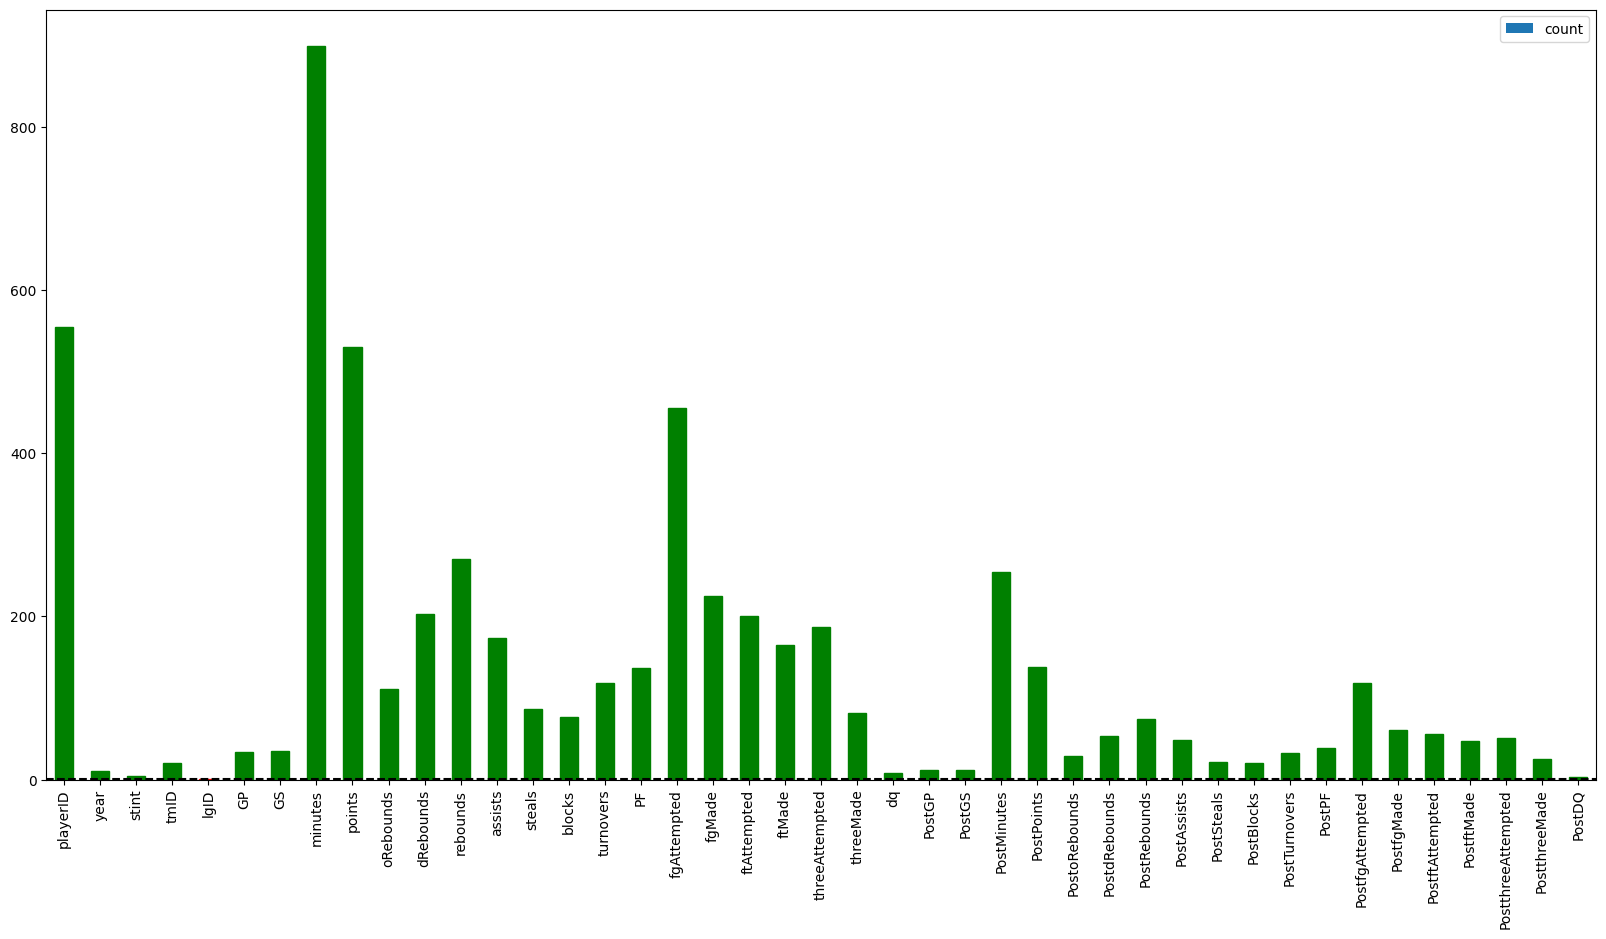

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [15]:
nulls_values_by_column(players_teams_dataSet, (20, 10))

unique_values_by_column(players_teams_dataSet, 1, (20,10))

num_columns = len(players_teams_dataSet.columns)
players_teams_dataSet = filter_column_uniques(players_teams_dataSet, 1)
print(f"Removed {num_columns - len(players_teams_dataSet.columns)} columns that had only one unique value")

num_rows = players_teams_dataSet.shape[0]

players_teams_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - players_teams_dataSet.shape[0]} repeated rows")

Presence of any outliers and noise

Removed 400 rows with zscore > 3


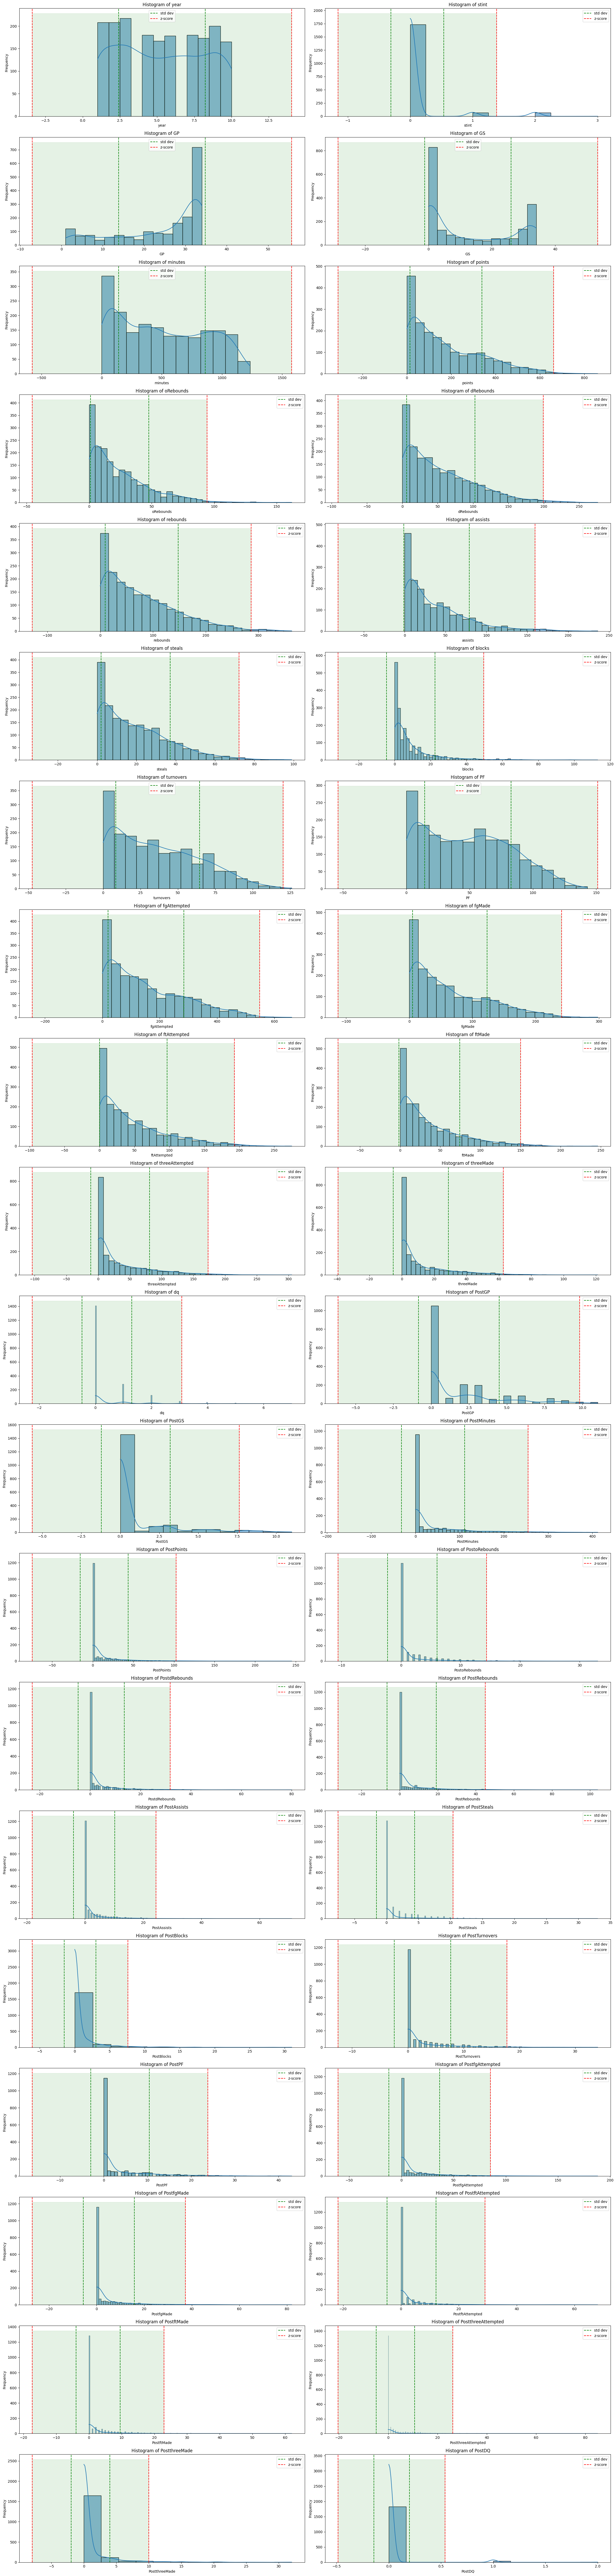

In [16]:
max_zscore = 3
rows2drop = set()
histogram_plot(players_teams_dataSet, max_zscore, (24, 100))

rows2drop_zscore = filter_by_zscore(players_teams_dataSet, max_zscore)
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

Saving the dataset

In [17]:
players_teams_dataSet.to_csv('../newData/players_teams_cleaned.csv', index=False)

### Series Post
Dataset about series post: each record describes the series' results

In [18]:
series_post_dataSet = pd.read_csv('../Other/basketballPlayoffs/series_post.csv')

Dealing with missing/duplicate/redundant data

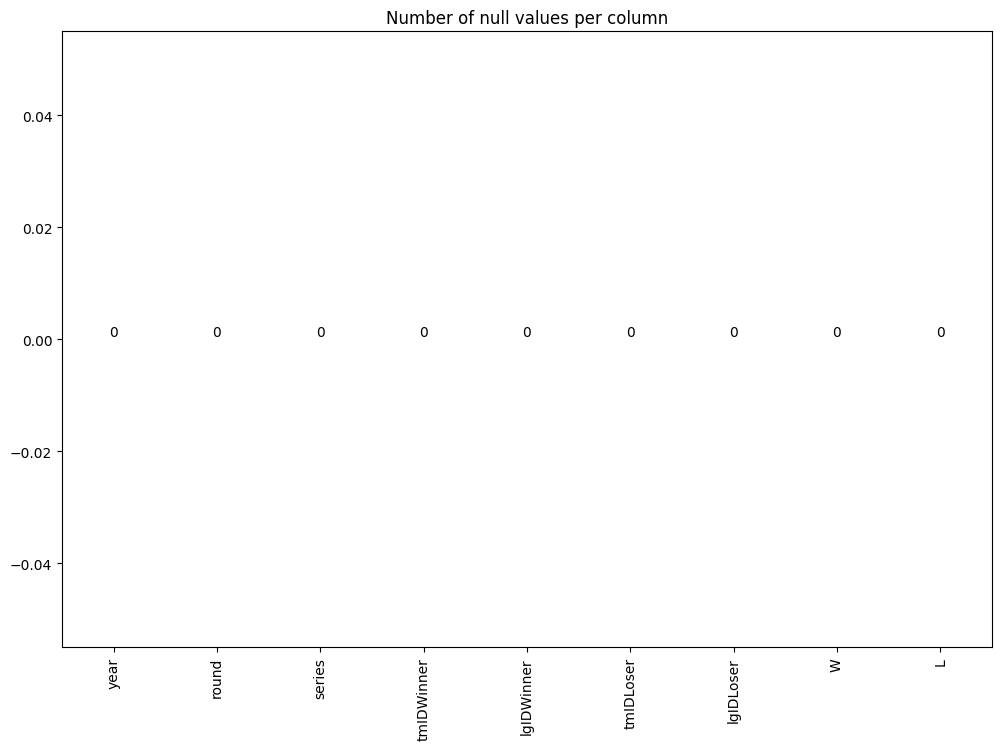

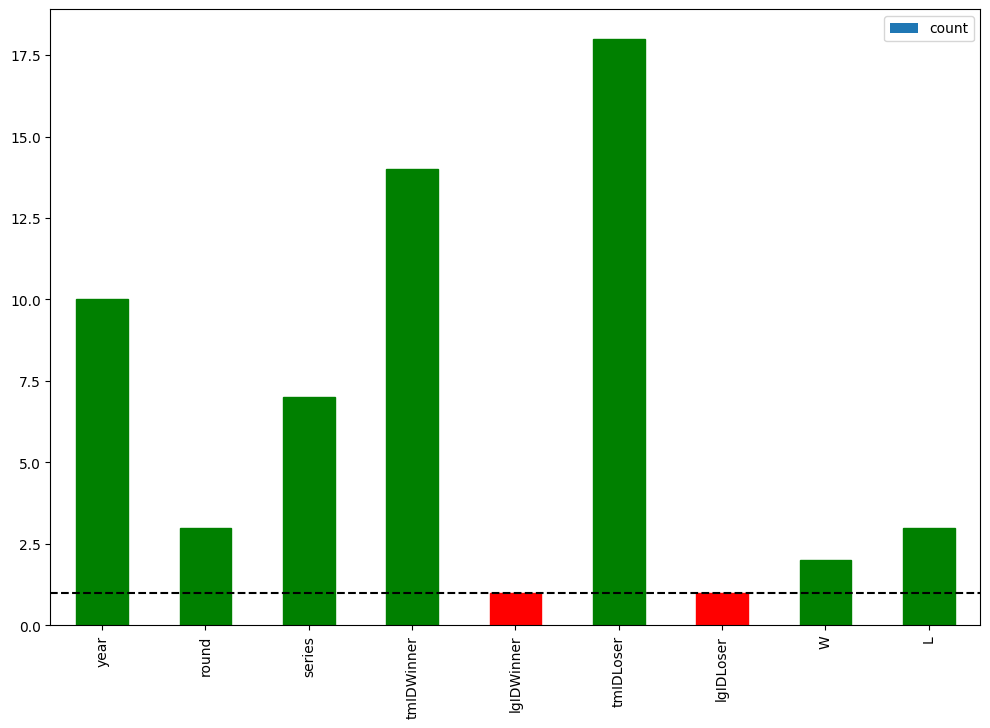

Removed 2 columns that had only one unique value
Removed 0 repeated rows


In [19]:
nulls_values_by_column(series_post_dataSet)

unique_values_by_column(series_post_dataSet, 1)

num_columns = len(series_post_dataSet.columns)
series_post_dataSet = filter_column_uniques(series_post_dataSet, 1)
print(f"Removed {num_columns - len(series_post_dataSet.columns)} columns that had only one unique value")

num_rows = series_post_dataSet.shape[0]
series_post_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - series_post_dataSet.shape[0]} repeated rows")

Treating any outliers and noise:

<Figure size 1500x1000 with 0 Axes>

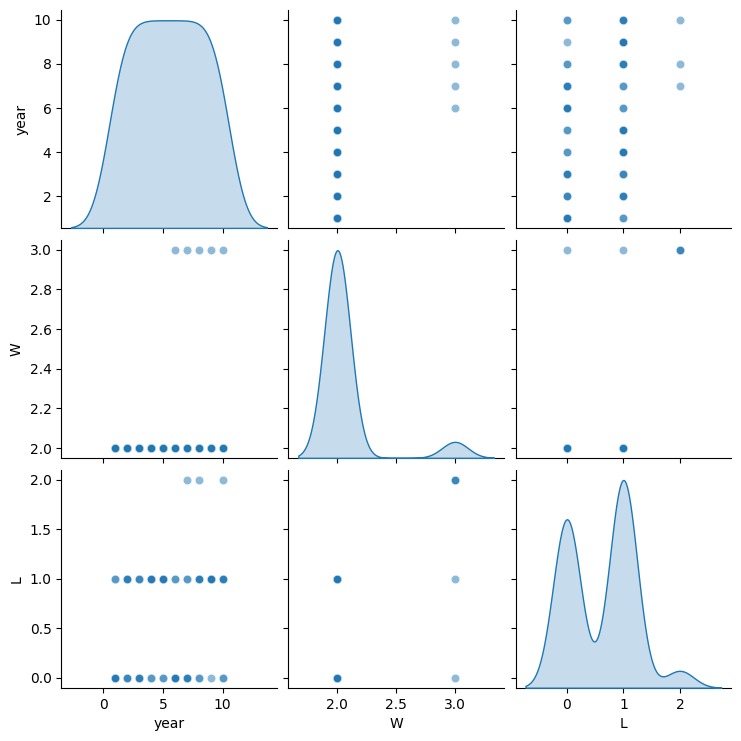

Founded 0 (0.0%) outliers
Removed 0 (0.0%) rows


In [20]:
rows2drop = set()
init_num_rows_series = series_post_dataSet.shape[0]

scatter_plot(series_post_dataSet.drop(rows2drop))

print(f"Founded {len(rows2drop)} ({round(len(rows2drop) / series_post_dataSet.shape[0] * 100, 1)}%) outliers")
series_post_dataSet.drop(rows2drop, axis = 0, inplace=True)
print(f"Removed {init_num_rows_series - series_post_dataSet.shape[0]} ({round((init_num_rows_series - series_post_dataSet.shape[0]) / init_num_rows_series * 100, 1)}%) rows")

Saving the dataset

In [21]:
series_post_dataSet.to_csv('../newData/series_post_cleaned.csv', index=False)

### Teams
Dataset about teams: each record describes the performance of the teams for each season.

In [22]:
teams_dataSet = pd.read_csv('../Other/basketballPlayoffs/teams.csv')

We did the same as the previous datasets: analysis of any missing, duplicate or redundant data

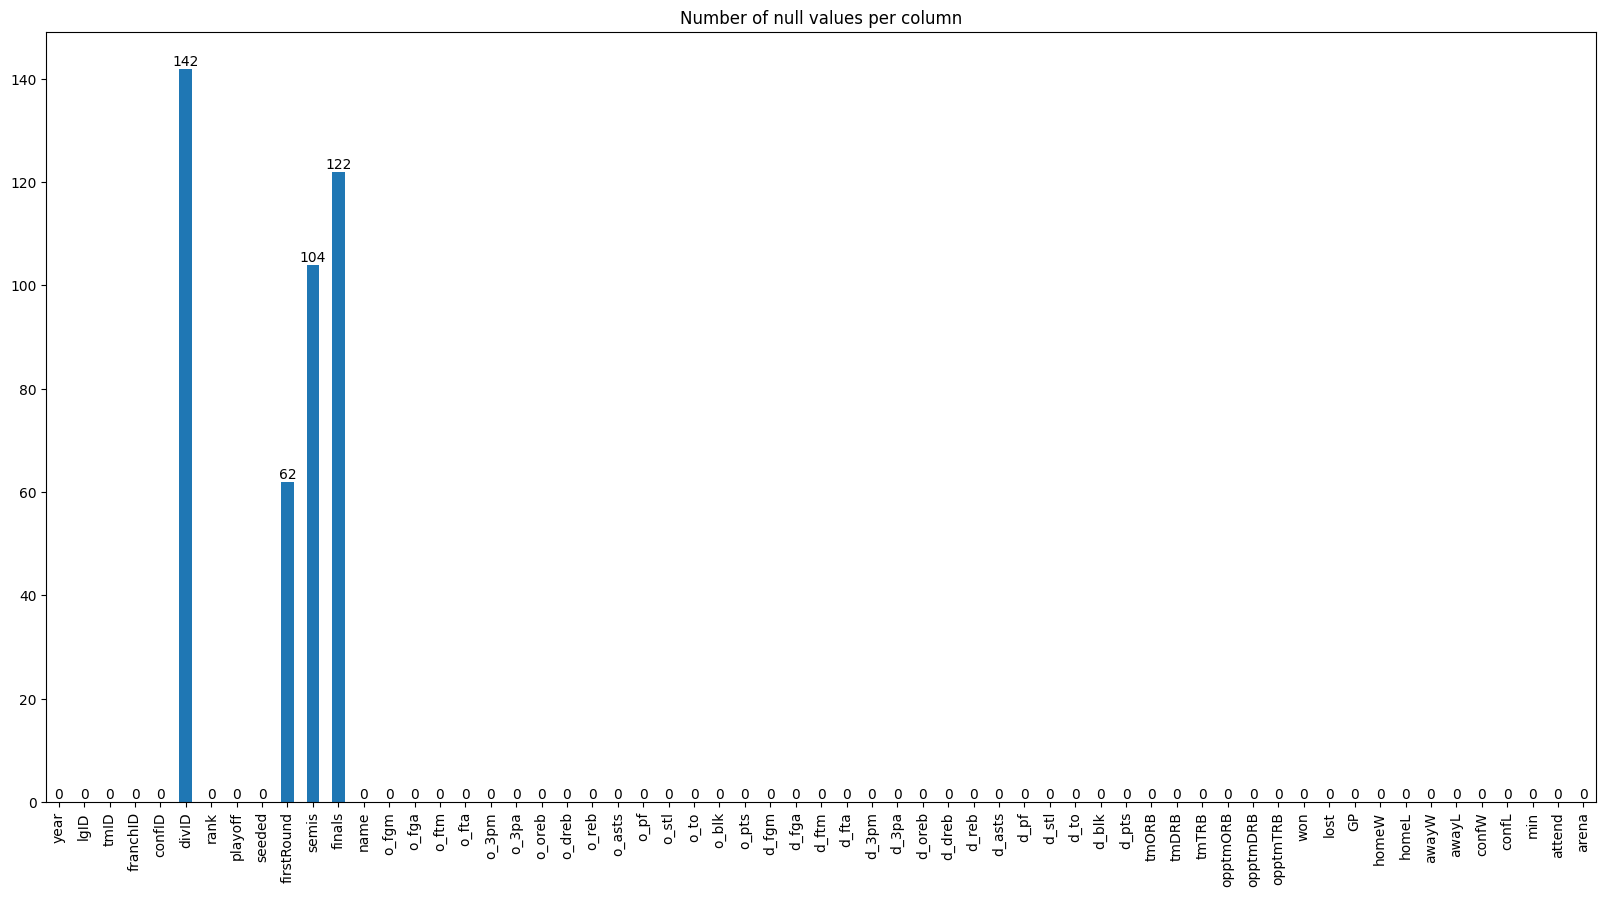

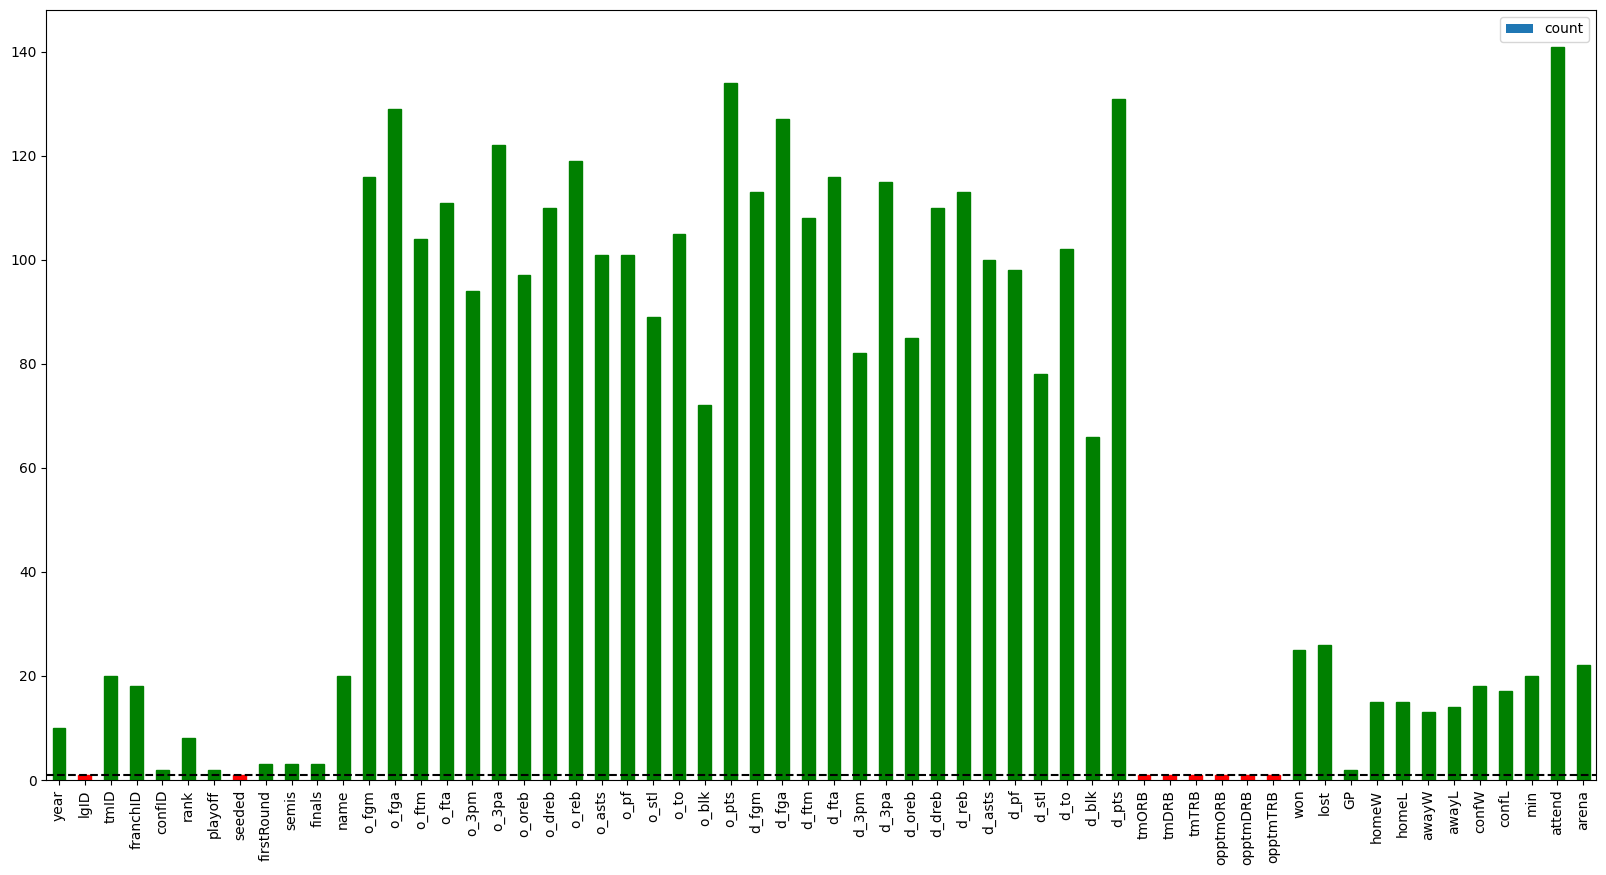

Removed 8 columns that had only one unique value
Removed 0 repeated rows


In [23]:
nulls_values_by_column(teams_dataSet, (20, 10))

teams_dataSet.drop(["divID"], inplace=True, axis=1)
teams_dataSet.fillna("N", inplace=True)

unique_values_by_column(teams_dataSet, 1, (20, 10))

num_columns = len(teams_dataSet.columns)
teams_dataSet = filter_column_uniques(teams_dataSet, 1)
print(f"Removed {num_columns - len(teams_dataSet.columns)} columns that had only one unique value")

num_rows = teams_dataSet.shape[0]
teams_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - teams_dataSet.shape[0]} repeated rows")

Analysis of any outliers and noise.

We saw that in the year 6 there are 2 winners, Connecticut Sun and Sacramento Monarchs. 

We decided to consider Connecticut Sun as winner

In [24]:
# change the winner to False in year 6 team Sacramento Monarchs
teams_dataSet.loc[(teams_dataSet["year"] == 6) & (teams_dataSet["name"] == "Sacramento Monarchs"), "finals"] = "N"

Removed 9 rows with zscore > 3


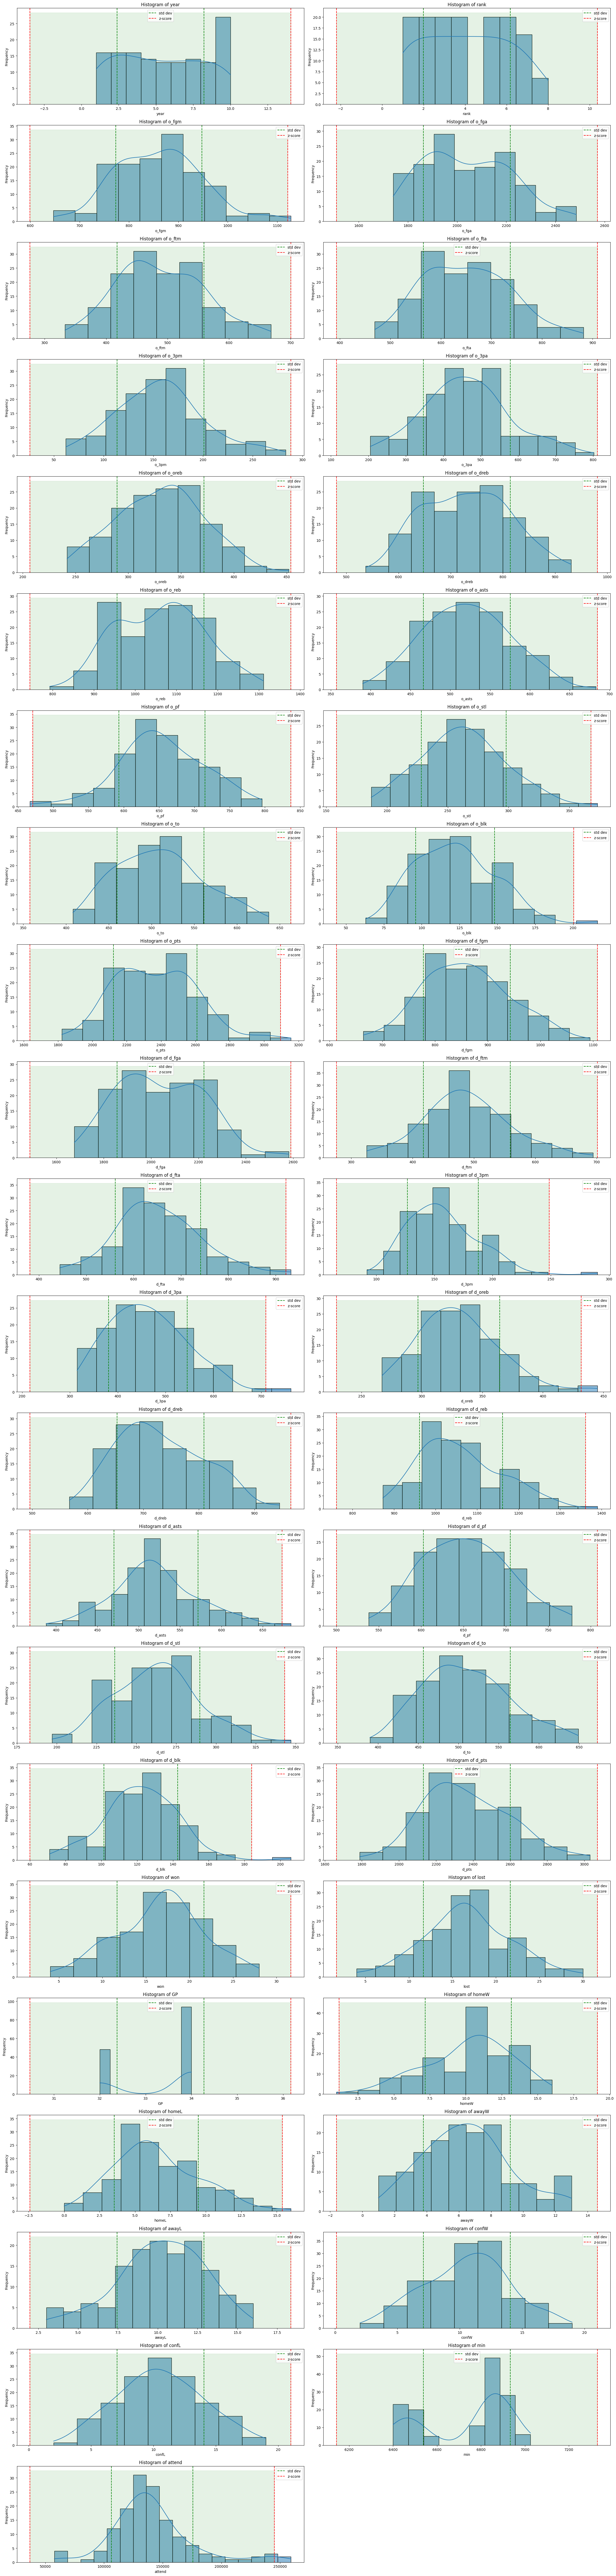

In [25]:
max_zscore = 3
rows2drop = set()
histogram_plot(teams_dataSet, max_zscore, (24, 100))


rows2drop_zscore = filter_by_zscore(teams_dataSet, max_zscore, ["attend"])
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

Saving dataset

In [26]:
teams_EA = teams_dataSet[teams_dataSet['confID'] == 'EA']
teams_WE = teams_dataSet[teams_dataSet['confID'] == 'WE']

#Split the data for each conference
teams_EA.to_csv('../newData/teams_EA_cleaned.csv', index=False)
teams_WE.to_csv('../newData/teams_WE_cleaned.csv', index=False)

### Teams Post
In this dataset each record describes the results of each team at the post-season.

In [27]:
teams_post_dataSet = pd.read_csv('../Other/basketballPlayoffs/teams_post.csv')

Dealing with missing/duplicate/redundant data

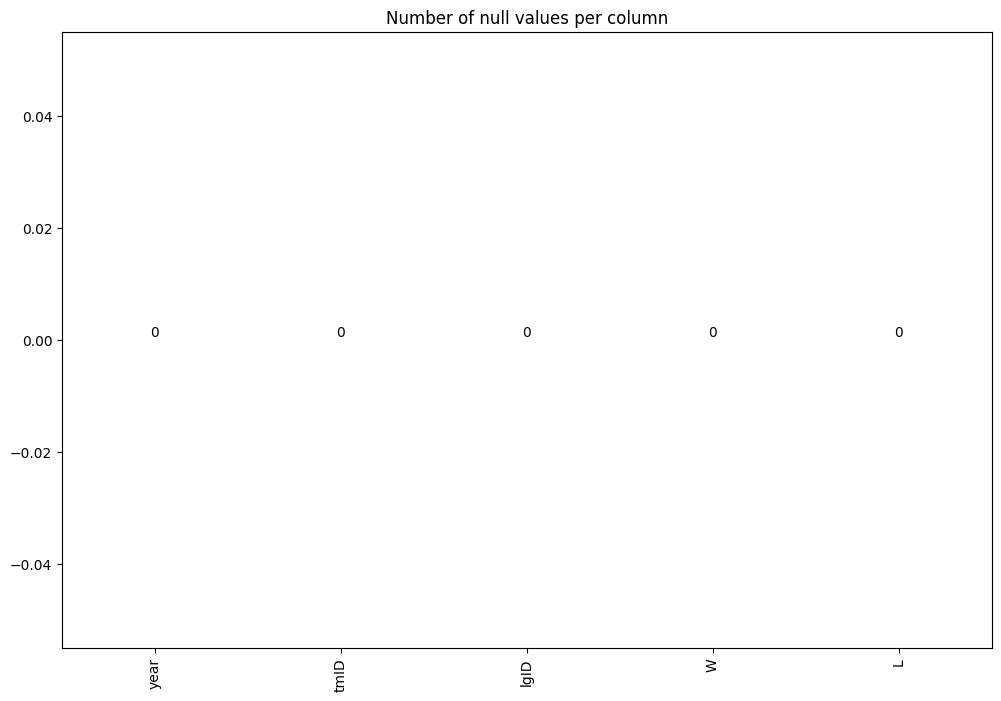

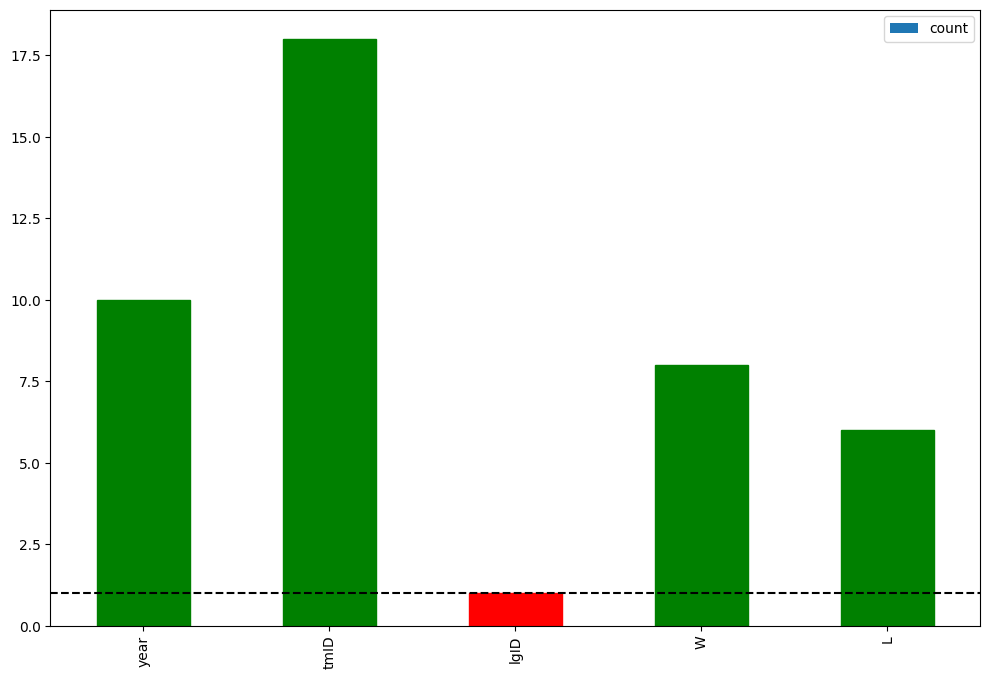

Removed 1 columns that had only one unique value
Removed 0 repeated rows


In [28]:
nulls_values_by_column(teams_post_dataSet)

unique_values_by_column(teams_post_dataSet, 1)

num_columns = len(teams_post_dataSet.columns)
teams_post_dataSet = filter_column_uniques(teams_post_dataSet, 1)
print(f"Removed {num_columns - len(teams_post_dataSet.columns)} columns that had only one unique value")

num_rows = teams_post_dataSet.shape[0]
teams_post_dataSet.drop_duplicates(inplace=True)
print(f"Removed {num_rows - teams_post_dataSet.shape[0]} repeated rows")

Study of Outliers and Noise

Removed 0 rows with zscore > 3


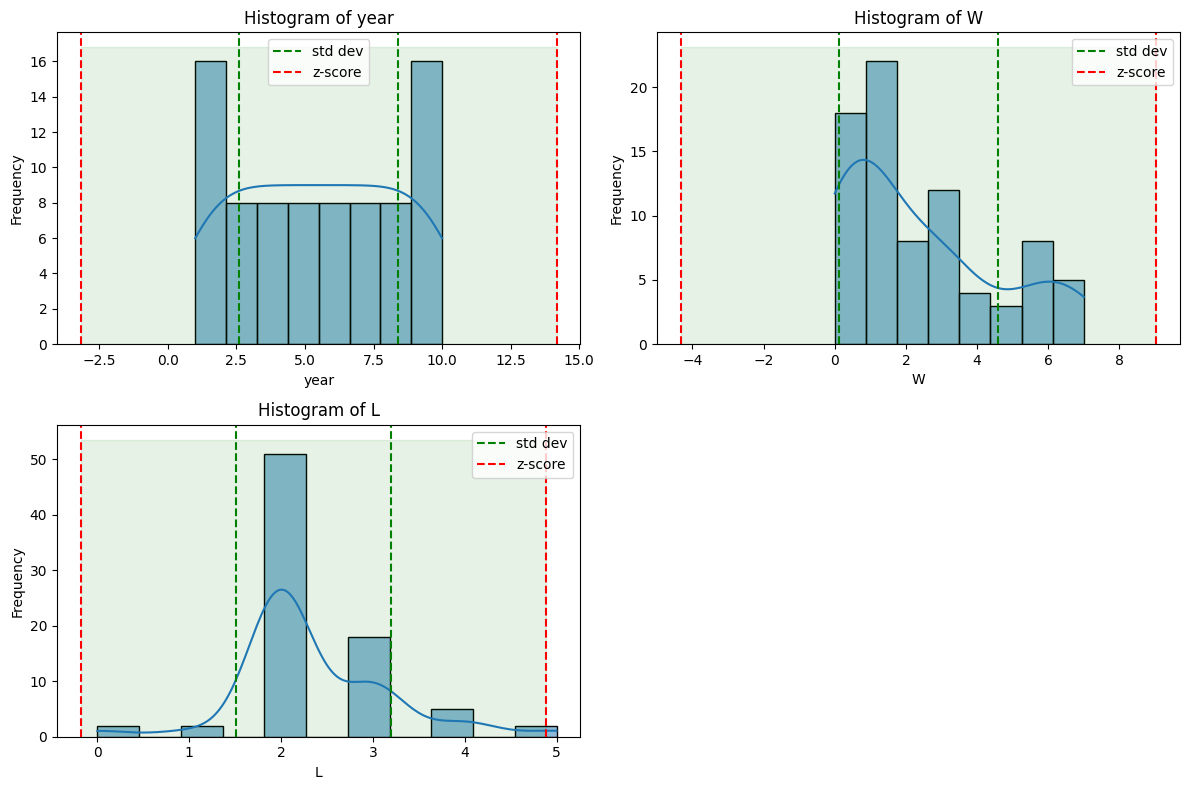

In [29]:
max_zscore = 3
rows2drop = set()
histogram_plot(teams_post_dataSet, max_zscore)

rows2drop_zscore = filter_by_zscore(teams_post_dataSet, max_zscore, ['L'])
print(f"Removed {len(rows2drop_zscore)} rows with zscore > {max_zscore}")

rows2drop.update(rows2drop_zscore)

Saving the dataset

In [30]:
teams_post_dataSet.to_csv('../newData/teams_post_cleaned.csv', index=False)

## Season 11

In [31]:
coaches_11 = pd.read_csv('../../Season_11/coaches.csv')
players_teams_11 = pd.read_csv('../../Season_11/players_teams.csv')
teams_11 = pd.read_csv('../../Season_11/teams.csv')

coaches_11.loc[coaches_11['tmID'] == 'TUL', 'tmID'] = 'DET'

teams_11.loc[(teams_11['tmID'] == 'TUL'), ['tmID', 'confID']] = ['DET', 'EA']

players_teams_11.loc[players_teams_11['tmID'] == 'TUL', 'tmID'] = 'DET'

teams_EA_11 = teams_11[teams_11['confID'] == 'EA']
teams_WE_11 = teams_11[teams_11['confID'] == 'WE']

#Split the data for each conference
teams_EA_11.to_csv('../../Season_11/teams_EA.csv', index=False)
teams_WE_11.to_csv('../../Season_11/teams_WE.csv', index=False)

coaches = pd.read_csv('../newData/coaches_cleaned.csv')
players_teams = pd.read_csv('../newData/players_teams_cleaned.csv')
teams_EA = pd.read_csv('../newData/teams_EA_cleaned.csv')
teams_WE = pd.read_csv('../newData/teams_WE_cleaned.csv')


merged_players_teams = pd.concat([players_teams, players_teams_11], ignore_index=True)
filtered_players_teams = merged_players_teams[players_teams.columns]

merged_teams_EA = pd.concat([teams_EA, teams_EA_11], ignore_index=True)
filtered_teams_EA = merged_teams_EA[teams_EA.columns]

merged_teams_WE = pd.concat([teams_WE, teams_WE_11], ignore_index=True)
filtered_teams_WE = merged_teams_WE[teams_WE.columns]

merged_coaches = pd.concat([coaches, coaches_11], ignore_index=True)
filtered_coaches = merged_coaches[coaches.columns]

#TODO: vedere se riusciamo ad aggiungere i pesi per il riempimento


### Players Teams Integration

In [32]:
# year 11 filter and before years
year_11_data = filtered_players_teams[filtered_players_teams['year'] == 11]
other_years_data = filtered_players_teams[filtered_players_teams['year'] != 11]

# statistics for each player based on prevoius years
player_avg_stats = other_years_data.groupby('playerID').mean(numeric_only=True)

# Calculates the average statistics for each team based on all previous years
team_avg_stats_all_years = other_years_data.groupby('tmID').mean(numeric_only=True)

# Function to fill missing values
def fill_missing_values_with_team_history(row):
    if row['playerID'] in player_avg_stats.index:
        player_stats = player_avg_stats.loc[row['playerID']]
        row = row.fillna(player_stats)
    if row['tmID'] in team_avg_stats_all_years.index:
        team_stats = team_avg_stats_all_years.loc[row['tmID']]
        row = row.fillna(team_stats)
    row = row.fillna(filtered_players_teams.mean(numeric_only=True))
    return row

# Apply the function for year 11 data
year_11_filled_final = year_11_data.apply(fill_missing_values_with_team_history, axis=1)

# Combine the updated Year 11 data with the rest of the dataset
final_dataset_final = pd.concat([other_years_data, year_11_filled_final], ignore_index=True)

final_dataset_final.to_csv('../newData/final_players_teams.csv', index=False)

### Coaches Integration

In [33]:
# year 11 filter and before years
year_11_data = filtered_coaches[filtered_coaches['year'] == 11]
other_years_data = filtered_coaches[filtered_coaches['year'] != 11]

# statistics for each player based on prevoius years
coach_avg_stats = other_years_data.groupby('coachID').mean(numeric_only=True)

# Calculates the average statistics for each team based on all previous years
coach_avg_stats_all_years = other_years_data.groupby('tmID').mean(numeric_only=True)

# Function to fill missing values
def fill_missing_values_with_team_history(row):
    if row['coachID'] in coach_avg_stats.index:
        player_stats = coach_avg_stats.loc[row['coachID']]
        row = row.fillna(player_stats)
    if row['tmID'] in coach_avg_stats_all_years.index:
        team_stats = coach_avg_stats_all_years.loc[row['tmID']]
        row = row.fillna(team_stats)
    row = row.fillna(filtered_coaches.mean(numeric_only=True))
    return row

# Apply the function for year 11 data
year_11_filled_final = year_11_data.apply(fill_missing_values_with_team_history, axis=1)

# Combine the updated Year 11 data with the rest of the dataset
final_dataset_final = pd.concat([other_years_data, year_11_filled_final], ignore_index=True)

final_dataset_final.to_csv('../newData/final_coaches.csv', index=False)

### Teams East Integration

In [34]:
numeric_columns = filtered_teams_EA.select_dtypes(include=['float64', 'int64']).columns

# Filtrare le squadre dell'anno 11
year_11 = filtered_teams_EA[filtered_teams_EA['year'] == 11]

# Riempire i dati mancanti per ogni squadra basandosi sugli anni precedenti
for team in year_11['tmID'].unique():
    # Filtra i dati della squadra negli anni precedenti
    team_data_past = filtered_teams_EA[(filtered_teams_EA['tmID'] == team) & (filtered_teams_EA['year'] < 11)]
    
    # Calcola la media delle statistiche per la squadra
    team_means = team_data_past[numeric_columns].mean()
    
    # Applica le medie alle righe dell'anno 11 per quella squadra
    filtered_teams_EA.loc[(filtered_teams_EA['tmID'] == team) & (filtered_teams_EA['year'] == 11), numeric_columns] = \
        filtered_teams_EA[(filtered_teams_EA['tmID'] == team) & (filtered_teams_EA['year'] == 11)][numeric_columns].fillna(team_means)

# Salvare il dataset aggiornato (opzionale)
filtered_teams_EA.to_csv('../newData/final_teams_EA.csv', index=False)

### Teams West Integration

In [35]:
numeric_columns = filtered_teams_WE.select_dtypes(include=['float64', 'int64']).columns

# Filtrare le squadre dell'anno 11
year_11 = filtered_teams_WE[filtered_teams_WE['year'] == 11]

# Riempire i dati mancanti per ogni squadra basandosi sugli anni precedenti
for team in year_11['tmID'].unique():
    # Filtra i dati della squadra negli anni precedenti
    team_data_past = filtered_teams_WE[(filtered_teams_WE['tmID'] == team) & (filtered_teams_WE['year'] < 11)]
    
    # Calcola la media delle statistiche per la squadra
    team_means = team_data_past[numeric_columns].mean()
    
    # Applica le medie alle righe dell'anno 11 per quella squadra
    filtered_teams_WE.loc[(filtered_teams_WE['tmID'] == team) & (filtered_teams_WE['year'] == 11), numeric_columns] = \
        filtered_teams_WE[(filtered_teams_WE['tmID'] == team) & (filtered_teams_WE['year'] == 11)][numeric_columns].fillna(team_means)

filtered_teams_WE.to_csv('../newData/final_teams_WE.csv', index=False)